## K-Means(평균) : 쉽고 많이 사용되나, 
* 1) 거리기반 알고리즘으로 속성의 개수가 매우 많을 경우, 정확도떨어짐, PCA로 차원감소
* 2) 반복을 수행하는데, 반복 횟수가 많을 경우 수행시간이 매울 느려짐
* 3) 몇 개의 군집(Cluster)을 선택해야 할 지 가이드가 어렵다

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### KMeans 파라미터
* n_clusters 가장중요 : 군집화할 갯수, 중심점의 갯수
* max_iter : 최대반복 횟수, 이 횟수이전에 모든 데이터의 중심점 이동없으면 종료
* ...   

In [3]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### labels_ : 군집 중심점
### cluster_centers_ : 각 군집 중심점 좌표 (shape[군집개수, 피처 개수])

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
print(kmeans.labels_)
irisDF['cluster']=kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
iris_result2 = irisDF.groupby(['target'])['cluster'].value_counts()
print(iris_result2)

target  cluster
0       1          50
1       0          48
        2           2
2       2          36
        0          14
Name: cluster, dtype: int64


## 군집 시각화 : PCA 적용하여 차원축소하여 시각화

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


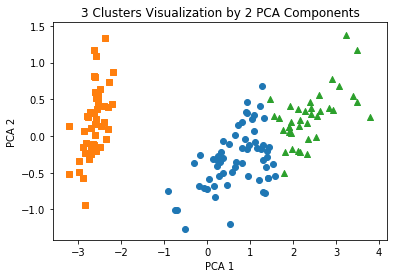

In [9]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


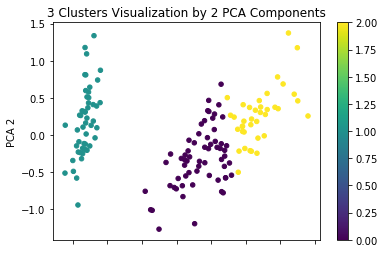

In [13]:
irisDF.plot(kind='scatter',
           x= 'pca_x',
           y='pca_y',
           s=20,
           c=irisDF.cluster,
           colormap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


### 데이터 생성
* make_blobs() 클러스터링 : 중심점과 표준편차 제어기능 추가
    - make_circle(), make_moon()
* make_classification() 분류 : 노이즈
* make_regression() 회귀(예측)

### make_blobs()의 파라미터 
* n_samples: 생성할 총 데이터의 개수, 디폴트 100개
* n_features : 시각화 목표시 2개 설정(x,y)
* centers : 군집의 갯수, ndarray 형태일경우 중심점의 좌표
* cluster_std : 표준편차 [0.8, 1.2, 0.6]

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [16]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


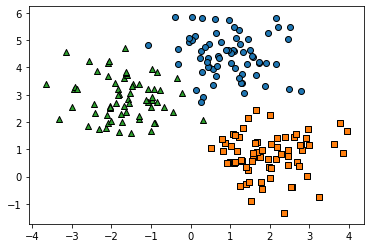

In [17]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

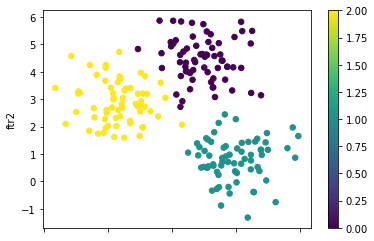

In [18]:
clusterDF.plot(kind='scatter',
              x='ftr1',
              y='ftr2',
              s=30,
              c=clusterDF.target,
              colormap='viridis')
plt.show()

[[ 0.990103    4.44666506]
 [-1.70636483  2.92759224]
 [ 1.95763312  0.81041752]]


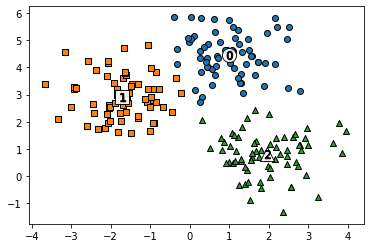

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [23]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
# irisDF['cluster']=kmeans.labels_

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
print(centers)
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

[[ 0.990103    4.44666506]
 [-1.70636483  2.92759224]
 [ 1.95763312  0.81041752]]


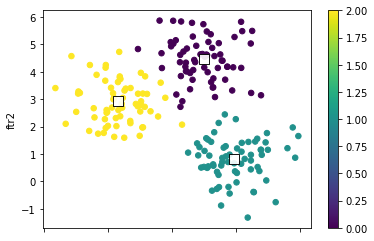

In [26]:
clusterDF.plot(kind='scatter',
              x='ftr1',
              y='ftr2',
              s=30,
              c=clusterDF.target,
              colormap='viridis')
centers = kmeans.cluster_centers_
print(centers)
for center in centers:
    plt.scatter(x=center[0],y=center[1], s=100, color='white',
                    alpha=0.9, edgecolor='k', marker='s')
plt.show()

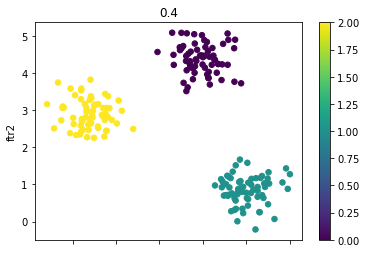

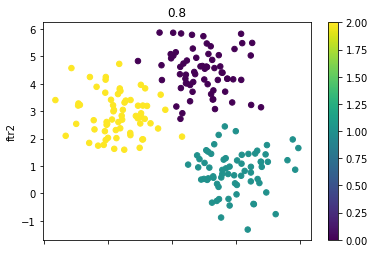

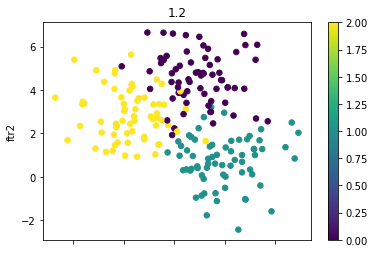

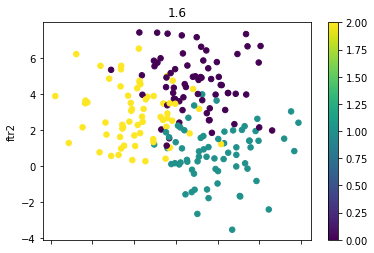

In [44]:
# 표준편차의 변화에 따른 데이터 형성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

cluster_std=[0.4, 0.8, 1.2, 1.6]

for i,value in enumerate(cluster_std):
    X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=value, random_state=0)
#     print(X.shape, y.shape)

#     # y target 값의 분포를 확인
#     unique, counts = np.unique(y, return_counts=True)
#     print(unique,counts)
    
    import pandas as pd

    clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    clusterDF['target'] = y

    clusterDF.plot(kind='scatter', #ax=axes[i],
                  x='ftr1',
                  y='ftr2',
                  s=30,
                  c=clusterDF.target,
                  colormap='viridis',
                  title=value)
    plt.xlabel('ftr1')
    plt.ylabel('ftr2')
#    plt.title("clusted_std")
    plt.show()
    
#  import pandas as pd
# import matplotlib.pyplot as plt
# df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
# fig, axes = plt.subplots(1,len(df.columns.values)-1, sharey=True)
# for i, col in enumerate(df.columns.values[:-1]):
#     df.plot(x=[col], y=["CCC"], kind="scatter", ax=axes[i])
# plt.show()